In [11]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc
from scipy import optimize
rc('pgf', rcfonts = False, preamble = r"\usepackage{siunitx}")

# Pràctica 4: Espectres Òptics

## (A) Posada a punt de l'aparell 

_corresponents observacions_

## (B) Observació de l'espectre

_corresponents observacions_

## (C) Calibració de l'espectròmetre

### Mesures i dades

Mesures de la desviació mínima, $\delta_m$ per a cada longitud d'ona del mercuri

* `longs_Hg[i]` és la longitud d'ona de cada ratlla en Å
* `delta_Hg[i]` és la mitjana de les corresponents mesures de $\delta_m$, en graus

In [35]:
dadesHg = [
    [4046.6, [35.95, 35.925]],
    [4078.2, [36.15, 36.21666]],
    [4358.3, [38.3, 38.3]],
    [4916.0, [41.04167, 41.1]],
    [5460.7, [42.783333, 42.75]],
    [5769.6, [43.45, 43.5]],
    [5789.7, [43.55, 43.5416666]]
]
delta_ref_raw = [110.0333, 110.05, 110.05]

In [86]:
for dada in dadesCd:
    print("{0[0]:.2f} & {0[1][0]:.3f} \\\\ \n {{}} & {0[1][1]:.3f} \\\\\n\\midrule".format(dada))

4413.00 & 38.625 \\ 
 {} & 38.658 \\
\midrule
4678.20 & 40.092 \\ 
 {} & 40.092 \\
\midrule
4799.90 & 40.600 \\ 
 {} & 40.625 \\
\midrule
5085.80 & 41.683 \\ 
 {} & 41.683 \\
\midrule
5155.10 & 41.883 \\ 
 {} & 41.908 \\
\midrule
6438.50 & 44.600 \\ 
 {} & 44.650 \\
\midrule


In [26]:
longs_Hg = [dada[0] for dada in dadesHg]

In [89]:
delta_Hg_raw = [dada[1] for dada in dadesHg]
delta_ref = np.average(delta_ref_raw)
delta_Hg = [delta_ref - np.average(deltes) for deltes in delta_Hg_raw]
delta_Hg, longs_Hg

([74.10693333333334,
  73.86110333333335,
  71.74443333333335,
  68.97359833333334,
  67.27776683333335,
  66.56943333333334,
  66.49860003333335],
 [4046.6, 4078.2, 4358.3, 4916.0, 5460.7, 5769.6, 5789.7])

In [124]:
delta_Hg_err = [np.sqrt(np.var(dada[1], ddof = 1) / 2 + 0.006**2) for dada in dadesHg]
delta_Hg_err

[0.01386542462386461,
 0.03386574818308258,
 0.006,
 0.02977578252540043,
 0.017713616859636048,
 0.0257099202643635,
 0.007304888013514746]

### Ajust de les constants del prisma
Fem l'ajust per a la fórmula de Hartmann

$$\lambda(\delta) = \lambda_0 + \frac{C}{\delta - \delta_0}$$

In [5]:
def hartmann(x, a, b, c):
    return a + b/(x - c)

params, params_err = optimize.curve_fit(hartmann, delta_Hg, longs_Hg, p0 = [1000, 30000, 60])
params

array([ 2454.87389244, 23182.05727843,    59.56158845])

In [6]:
lambda_0 = (params[0], np.sqrt(params_err[0][0]))
lambda_0

(2454.873892444373, 39.55049149188062)

In [7]:
C = (params[1], np.sqrt(params_err[1][1]))
C

(23182.057278426386, 801.2266705023592)

In [66]:
delta_0 = (params[2], np.sqrt(params_err[2][2]))
delta_0

(59.561588454627476, 0.16199644709538463)

In [77]:
# Calculem el coeficient de correlació
SS_tot = sum([(l - np.mean(longs_Hg))**2 for l in longs_Hg])
SS_res = sum([(l - hartmann(d, lambda_0[0], C[0], delta_0[0]))**2 for l,d in zip(longs_Hg, delta_Hg)])
1 - SS_res/SS_tot

0.9999694842983892

In [9]:
t = np.arange(delta_Hg[-1], delta_Hg[0], 0.1)
hart = hartmann(t, lambda_0[0], C[0], delta_0[0])

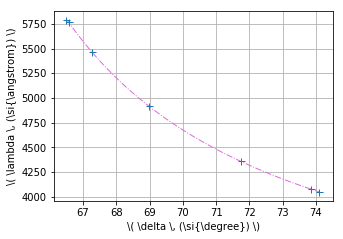

In [94]:
plt.figure(figsize = (5,3.5))
plt.grid(True)
plt.plot(t, hart, ls = '-.', color = 'orchid', lw = 1)
plt.plot(delta_Hg, longs_Hg, marker = '+', ms = 7, mfc = 'lightblue', ls = '')
plt.errorbar(delta_Hg, longs_Hg, xerr = delta_Hg_err, ecolor = 'lightblue', fmt = 'none')
plt.ylabel(r"\( \lambda \, (\si{\angstrom}) \)")
plt.xlabel(r"\( \delta \, (\si{\degree}) \)")


plt.savefig('hartmann.pgf')

## (D) Determinació de longituds d'ona

Ara mesurem els angles de desviació mínima i calculem les longituds d'ona de les corresponents franges de l'espectre de cadmi fent servir la fórmula de Hartmann

* `longsCd[i]` és la longitud d'ona de cada ratlla en Å
* `deltaCd[i]` és la mitjana de les corresponents mesures de $\delta_m$, en graus 

In [29]:
dadesCd = [
    [4413, [38.625, 38.6583333]],
    [4678.2, [40.09166666, 40.091666666]],
    [4799.9, [40.6, 40.625]],
    [5085.8, [41.683333, 41.683333]],
    [5155.1, [41.88333, 41.9083333]],
    [6438.5, [44.6, 44.65]]
]

In [34]:
longs_Cd = [dada[0] for dada in dadesCd]
delta_Cd = [delta_ref - np.mean(dada[1]) for dada in dadesCd]
longs_Cd, delta_Cd

([4413, 4678.2, 4799.9, 5085.8, 5155.1, 6438.5],
 [71.40276668333334,
  69.95276667033335,
  69.43193333333335,
  68.36110033333335,
  68.14860168333334,
  65.41943333333334])

Calculem les longituds d'ona amb Hartmann

In [122]:
longs_Cd_exp = [hartmann(d, lambda_0[0], C[0], delta_0[0]) for d in delta_Cd]
longs_Cd_err = [np.abs(exp - teo) for exp,teo in zip(longs_Cd_exp, longs_Cd)]
longs_Cd_exp, longs_Cd

([4412.623098703891,
  4685.810249919947,
  4803.531164637465,
  5089.344712868529,
  5154.538684031066,
  6412.311782733443],
 [4413, 4678.2, 4799.9, 5085.8, 5155.1, 6438.5])

In [125]:
def n(x):
    mu = np.mean(delta_Hg)
    ss = sum([(delta - mu)**2 for delta in delta_Hg])
    return 1/(1 / len(longs_Hg) + (x - mu)**2 / ss)

delta_Cd_err = [np.sqrt(np.var(dada[1], ddof = 1) / 2 + 0.006**2) for dada in dadesCd]
var = SS_res / (len(longs_Hg) - 2)
longs_Cd_unc = [np.sqrt(var/n(d) + (C[0]*u / (d - delta_0[0]))**2) for d,u in zip(delta_Cd, delta_Cd_err)]
longs_Cd_unc, longs_Cd_err

([34.73483736358115,
  13.501078872395382,
  32.6136334593857,
  15.927497441292457,
  37.49007015185836,
  101.7919871621219],
 [0.37690129610928125,
  7.610249919946909,
  3.63116463746519,
  3.544712868529132,
  0.5613159689346503,
  26.18821726655733])

In [133]:
for x in zip(longs_Cd, longs_Cd_exp, longs_Cd_unc, longs_Cd_err):
    print("{0} & {1:.3g} \\pm {2:.1g} & {3:.2g} \\\\".format(x[0]/10, x[1]/10, x[2]/10, x[3]/10))

441.3 & 441 \pm 3 & 0.038 \\
467.82 & 469 \pm 1 & 0.76 \\
479.98999999999995 & 480 \pm 3 & 0.36 \\
508.58000000000004 & 509 \pm 2 & 0.35 \\
515.51 & 515 \pm 4 & 0.056 \\
643.85 & 641 \pm 1e+01 & 2.6 \\


## (E) Corba de dispersió del vidre
Fem servir la fórmula $$n(\lambda) = \frac{\sin{\left(\frac{\delta(\lambda) + \alpha}{2}\right)}}{\sin{\left(\frac{\alpha}{2}\right)}}$$
amb $\alpha = 60º$ per trobar els diversos índexs de dispersió del vidre

In [18]:
# Definim funcions trigonomètriques per graus
sind(x) = sin(180/pi * x)

In [20]:
index(x) = sin((x + 60)/2) / sin(60/2)
ns = []

# Calcular els corresponents índexos de refracció

_s'ha de calcular el nombre d'Abbe del vidre_

## (F) Observació de diferents espectres 

_corresponents observacions_